In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
avg_life_exp_by_year = df.groupby('year').lifeExp.mean()
avg_life_exp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [6]:
content_describe = df.groupby('continent').lifeExp.describe()
content_describe

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


In [7]:
import numpy as np
cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)
cont_le_agg

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [8]:
def my_mean(values):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    return (sum / n)

In [9]:
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [10]:
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return (mean - diff_value)

In [13]:
global_mean = df.lifeExp.mean()

In [14]:
df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [15]:
df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [16]:
# dataframe
gdf_dict = df.groupby('year').agg({'lifeExp':'mean', 'pop':'median', 'gdpPercap':'median'})
gdf_dict

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334741
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


In [19]:
# series
gdf = df.groupby('year')['lifeExp'].agg(
    [np.count_nonzero, np.mean, np.std]).rename(
    columns={'count_nonzero':'count',
             'mean':'avg',
             'std': 'std_dev'}).reset_index()
gdf

,year,count,avg,std_dev
0,1952,142.0,49.057620,12.225956
1,1957,142.0,51.507401,12.231286
2,1962,142.0,53.609249,12.097245
3,1967,142.0,55.678290,11.718858
4,1972,142.0,57.647386,11.381953
5,1977,142.0,59.570157,11.227229
6,1982,142.0,61.533197,10.770618
7,1987,142.0,63.212613,10.556285
8,1992,142.0,64.160338,11.227380
9,1997,142.0,65.014676,11.559439


In [20]:
def my_zscore(x):
    return((x - x.mean()) / x.std())

In [21]:
transform_z = df.groupby('year').lifeExp.transform(my_zscore)

In [22]:
df.shape

(1704, 6)

In [23]:
transform_z.shape

(1704,)

In [24]:
from scipy.stats import zscore

In [25]:
sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)
sp_z_nogroup = zscore(df.lifeExp)

In [26]:
transform_z.head()

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64

In [27]:
sp_z_grouped.head()

0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64

In [28]:
sp_z_nogroup[:5]

array([-2.37533395, -2.25677417, -2.1278375 , -1.97117751, -1.81103275])

In [29]:
import seaborn as sns
import numpy as np

np.random.seed(42)

tips_10 = sns.load_dataset('tips').sample(10)
tips_10.loc[np.random.permutation(tips_10.index)[:4],'total_bill'] = np.NaN
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [31]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


In [32]:
def fill_na_mean(x):
    avg = x.mean()
    return(x.fillna(avg))

total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill'] = total_bill_group_mean
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800


In [33]:
tips_10[['sex', 'total_bill', 'fill_total_bill']]

,sex,total_bill,fill_total_bill
24,Male,19.82,19.8200
6,Male,8.77,8.7700
153,Male,NaN,17.9525
211,Male,NaN,17.9525
198,Female,NaN,13.9300
176,Male,NaN,17.9525
192,Male,28.44,28.4400
124,Female,12.48,12.4800
9,Male,14.78,14.7800
101,Female,15.38,15.3800


In [34]:
tips = sns.load_dataset('tips')
display(tips.shape)

(244, 7)

In [35]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [36]:
tips_filtered = tips.groupby('size').filter(
    lambda x: x['size'].count() >= 30)
tips_filtered.shape

(231, 7)

In [37]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

In [38]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
grouped = tips_10.groupby('sex')
grouped

In [39]:
grouped.groups

{'Male': Int64Index([24, 6, 153, 211, 176, 192, 9], dtype='int64'),
 'Female': Int64Index([198, 124, 101], dtype='int64')}

In [40]:
# just returns averages on columns where it makes sense
avgs = grouped.mean()
avgs

,total_bill,tip,size
sex,,,
Male,20.02,2.875714,2.571429
Female,13.62,2.506667,2.000000


In [41]:
tips_10.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [42]:
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [43]:
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [44]:
for sex_group in grouped:
    print('the type is {}\n'.format(type(sex_group)))
    print('the length is {}\n'.format(len(sex_group)))
    print('the first element is {}\n'.format(sex_group[0]))
    print('it has a type of: {}\n'.format(type(sex_group[0])))
    print('the second element is {}\n'.format(sex_group[1]))
    print('it has a type of: {}\n'.format(type(sex_group[1])))
    print('what we have:')
    print(sex_group)
    break

the type is <class 'tuple'>

the length is 2

the first element is Male

it has a type of: <class 'str'>

the second element is      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of: <class 'pandas.core.frame.DataFrame'>

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56

In [45]:
bill_sex_time = tips_10.groupby(['sex', 'time'])
group_avg = bill_sex_time.mean()
group_avg

total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000

In [46]:
print(type(group_avg))

<class 'pandas.core.frame.DataFrame'>


In [47]:
group_avg.columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [48]:
group_avg.index

MultiIndex(levels=[['Male', 'Female'], ['Lunch', 'Dinner']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['sex', 'time'])

In [49]:
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
group_method

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [50]:
group_param = tips_10.groupby(['sex', 'time'], as_index=False).mean()
group_param

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [52]:
intv_df = pd.read_csv('../data/epi_sim.txt')
print(intv_df.shape)

(9434653, 6)


In [53]:
intv_df.head()

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135


In [54]:
count_only = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count()
count_only.head(n=10)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64

In [57]:
count_mean = count_only.groupby(level=[0,1,2]).mean()
count_mean.head(n=10)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64

In [61]:
# combined
count_mean = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type']. \
    count().groupby(level=[0,1,2]).mean()
count_mean.head(n=10)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64

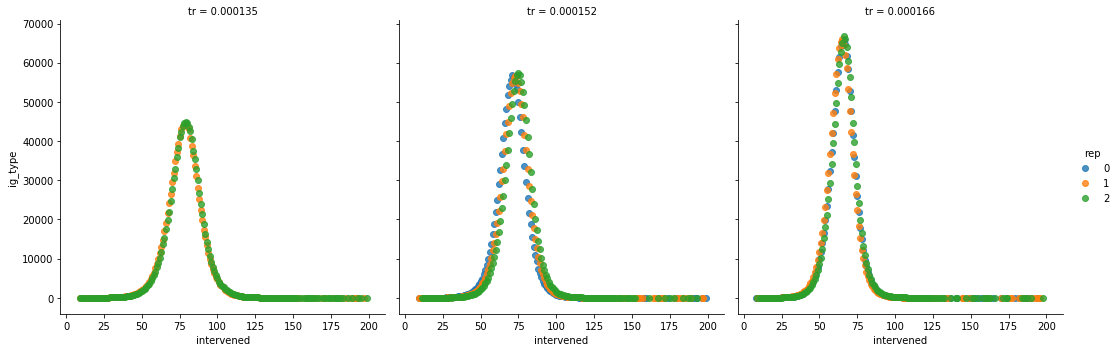

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.lmplot(x='intervened', y='ig_type', 
                 hue='rep', col='tr', fit_reg=False,
                 data=count_mean.reset_index())
plt.show()

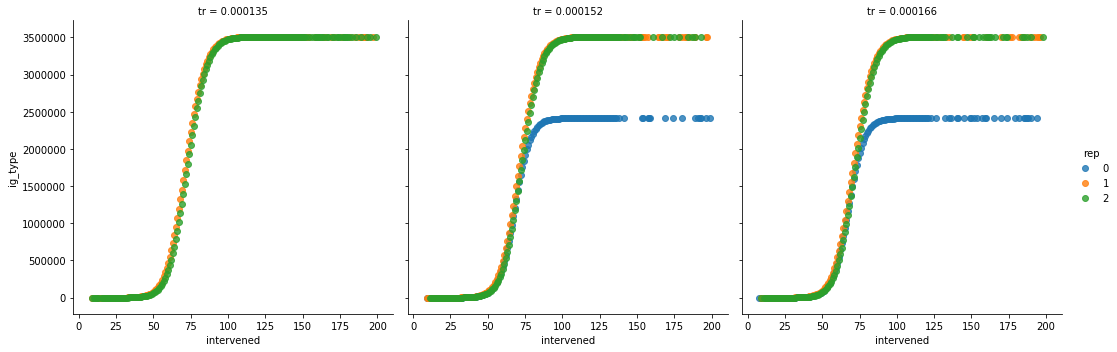

In [63]:
cumulative_count = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type']. \
    count().groupby(level=['rep']).cumsum().reset_index()
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr',
                 fit_reg=False, data=cumulative_count)
plt.show()